In [1]:
import sys
sys.path.append('..')
from hijacobi import Task, Spherically_Symmetric, reparam
import torch
import matplotlib.pyplot as plt


02:59:17|TQ-WARNING| Error enabling CUDA. cuda.is_available() returned False. CPU will be used.


Test passed, setting fuction as Ith


In [55]:
# Проверка решателя на единичной задаче:
gma0 = torch.linspace(-1, 1, 3)*torch.pi
p0 = torch.ones_like(gma0)

eq00 = Task0.make_eq(0, 1)
#eq_p = Solver0.transform_eq(eq00)
eq_p = lambda p: eq00(Solver0.L(gma0, p), Solver0.Q(gma0, p))

rf = Solver0.get_rootfinder()
p_res = (eq_p, p0) 
err = eq00(Solver0.L(gma0, p_res), Solver0.Q(gma0, p_res))
print('Found p = ', p_res, '; err = ', err)

TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'Tensor'

In [2]:
# Проверка решателя на единичной задаче:
gma0 = torch.linspace(1, 2, 3)*torch.pi
p0 = torch.ones_like(gma0)

eq00 = Task0.make_eq(0, 1)
eq_p = lambda p, gma: eq00(Solver0.L(gma0, p), Solver0.Q(gma0, p))
                           
_, p_res, err_ = Solver0.solve(eq_p, gma0, p0, 1)
err = eq00(Solver0.L(gma0, p_res), Solver0.Q(gma0, p_res))
print('Found p = ', p_res, '; err = ', err)

c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


IndexError: The shape of the mask [3] at index 0 does not match the shape of the indexed tensor [1] at index 0

In [ ]:
gma0 = torch.linspace(-1, 1, 1)*torch.pi
p0 = torch.ones_like(gma0)

print(eq00(Solver0.L(gma0, p0), Solver0.Q(gma0, p0))-eqn)

In [44]:
# отчаяние
gma0 = torch.linspace(0, 2, 24)*torch.pi
p0 = torch.ones_like(gma0)

res = Task0.get_solution_frame()

#eq0 = self.make_eq(0, 0)
#self.sol.prepare(eq0)

for n in range(Task0.N_eq):
    
    for i in range(Task0.eq_shape[n]):

        print('Solving Eq #', n, ', b.c. ', i)
        eq = Task0.make_eq(n, i)
        eq_p = lambda p, gma: eq(Solver0.L(gma, p), Solver0.Q(gma, p))
        parA, parB, err = Solver0.solve(eq_p, gma0, p0, 1)

        res[n][i]['res'] = [parA, parB]
        res[n][i]['err'] = err
        print(err)


Solving Eq # 0 , b.c.  0
tensor([1.1590, 1.1540, 1.1390, 1.1137, 1.0776, 1.0300, 0.9710, 0.9028, 0.8315,
        0.7669, 0.7184, 0.6924, 0.6924, 0.7184, 0.7669, 0.8315, 0.9028, 0.9710,
        1.0300, 1.0776, 1.1137, 1.1390, 1.1540, 1.1590])
Solving Eq # 0 , b.c.  1


c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\xitorch\_impls\optimize\root\rootsolver.py:165: ConvergenceWarning: The rootfinder does not converge after 100 iterations. Best |dx|=4.899e+00, |f|=3.748e+00 at iter 0
  warnings.warn(ConvergenceWarning(msg))


tensor([0.9923, 0.9843, 0.9607, 0.9224, 0.8707, 0.8068, 0.7323, 0.6502, 0.5675,
        0.4941, 0.4397, 0.4109, 0.4109, 0.4397, 0.4941, 0.5675, 0.6502, 0.7323,
        0.8068, 0.8707, 0.9224, 0.9607, 0.9843, 0.9923])
Solving Eq # 1 , b.c.  0


c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\xitorch\_impls\optimize\root\rootsolver.py:165: ConvergenceWarning: The rootfinder does not converge after 100 iterations. Best |dx|=4.899e+00, |f|=2.848e+00 at iter 0
  warnings.warn(ConvergenceWarning(msg))


tensor([0.7894, 0.7842, 0.7684, 0.7418, 0.7034, 0.6511, 0.5807, 0.4842, 0.3500,
        0.1703, 0.0342, 0.1860, 0.1860, 0.0342, 0.1703, 0.3500, 0.4842, 0.5807,
        0.6511, 0.7034, 0.7418, 0.7684, 0.7842, 0.7894])
Solving Eq # 1 , b.c.  1
tensor([0.6227, 0.6145, 0.5901, 0.5505, 0.4965, 0.4279, 0.3419, 0.2316, 0.0859,
        0.1025, 0.3128, 0.4675, 0.4675, 0.3128, 0.1025, 0.0859, 0.2316, 0.3419,
        0.4279, 0.4965, 0.5505, 0.5901, 0.6145, 0.6227])


c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\xitorch\_impls\optimize\root\rootsolver.py:165: ConvergenceWarning: The rootfinder does not converge after 100 iterations. Best |dx|=4.899e+00, |f|=2.168e+00 at iter 0
  warnings.warn(ConvergenceWarning(msg))


In [4]:
# Setting model
metric_f = lambda r: 1-2/r
BH = Spherically_Symmetric(f=metric_f)

# Setting up solver
Solver0 = reparam(BH)
Solver0.set_Simpson()
Solver0.setup(2.4, 1e-4, 100, 31)
Solver0.setCustomIth(BH.Ith)

# Setting up task
th_s = torch.pi/2
th_obs = torch.pi*86/180

r_s = torch.Tensor([2.1, 2.4, 2.8, 3.2, 3.6, 4, 4.5, 5, 5.6, 6.2, 7, 8, 9, 10, 11.1])
r_obs = 500

ic_0 = torch.Tensor([[[th_s, th_obs], [r_, r_obs]]for r_ in r_s ])

Task0 = Task(BH, [[0, 0, ic_0],
                  [1, 0, ic_0]])

Task0.set_solver(Solver0)

Test passed, setting fuction as Ith


In [5]:
gma0 = torch.linspace(0, 2, 24)*torch.pi
p0 = torch.ones_like(gma0)

res = Task0.solve(gma0, p0, 1)

Solving Eq # 0 , b.c.  0
Solving Eq # 0 , b.c.  1
Solving Eq # 0 , b.c.  2
Solving Eq # 0 , b.c.  3
Solving Eq # 0 , b.c.  4
Solving Eq # 0 , b.c.  5
Solving Eq # 0 , b.c.  6
Solving Eq # 0 , b.c.  7
Solving Eq # 0 , b.c.  8
Solving Eq # 0 , b.c.  9
Solving Eq # 0 , b.c.  10
Solving Eq # 0 , b.c.  11
Solving Eq # 0 , b.c.  12
Solving Eq # 0 , b.c.  13
Solving Eq # 0 , b.c.  14
Solving Eq # 1 , b.c.  0
Solving Eq # 1 , b.c.  1
Solving Eq # 1 , b.c.  2
Solving Eq # 1 , b.c.  3
Solving Eq # 1 , b.c.  4
Solving Eq # 1 , b.c.  5
Solving Eq # 1 , b.c.  6
Solving Eq # 1 , b.c.  7
Solving Eq # 1 , b.c.  8
Solving Eq # 1 , b.c.  9
Solving Eq # 1 , b.c.  10
Solving Eq # 1 , b.c.  11
Solving Eq # 1 , b.c.  12
Solving Eq # 1 , b.c.  13
Solving Eq # 1 , b.c.  14


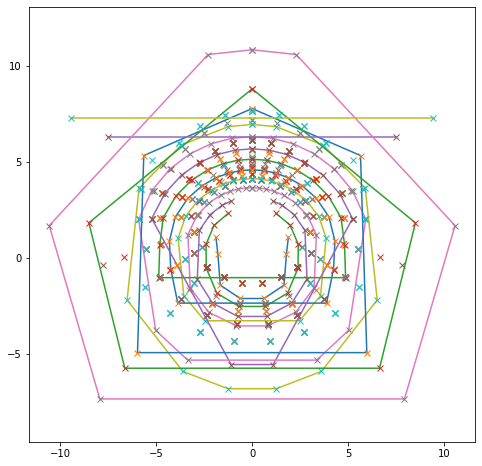

In [7]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

for eqN in range(len(Task0.eq_shape)):
    for bcN in range(Task0.eq_shape[eqN]):
        gma_s = res[eqN][bcN]['res'][0]
        p_s = res[eqN][bcN]['res'][1]
        err = res[eqN][bcN]['err']
        mask_t = torch.less(abs(err), 1e-4)
        gma_true = gma_s[mask_t]
        p_true = p_s[mask_t]

        l_s = Solver0.L(gma_s, p_s)
        q_s = Solver0.Q(gma_s, p_s)

        l_true = Solver0.L(gma_true, p_true)
        q_true = Solver0.Q(gma_true, p_true)

        ax.plot(l_true, q_true)
        ax.plot(l_s, q_s, 'x')
        ax.axis('equal')


In [30]:
Task0.eq_shape

[3]

In [29]:
res[0][0]

{'i.c.': [tensor([[  1.5708,   0.6283],
          [  2.1000, 500.0000]])],
 'res': [tensor([0.0000, 0.2732, 0.5464, 0.8195, 1.0927, 1.3659, 1.6391, 1.9123, 2.1855,
          2.4586, 2.7318, 3.0050, 3.2782, 3.5514, 3.8245, 4.0977, 4.3709, 4.6441,
          4.9173, 5.1905, 5.4636, 5.7368, 6.0100, 6.2832]),
  tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1.])],
 'err': tensor([1.1590, 1.1540, 1.1390, 1.1137, 1.0776, 1.0300, 0.9710, 0.9028, 0.8315,
         0.7669, 0.7184, 0.6924, 0.6924, 0.7184, 0.7669, 0.8315, 0.9028, 0.9710,
         1.0300, 1.0776, 1.1137, 1.1390, 1.1540, 1.1590])}